In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
Gender_survival=train_data.groupby('Sex')['Survived'].value_counts()

In [6]:
Gender_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
male=train_data['Sex'][train_data['Sex']=='male'].count()
female=train_data['Sex'][train_data['Sex']=='female'].count()
percentage_share_female = Gender_survival[0:2].apply( lambda x: round( 100 * x /female))
percentage_share_male = Gender_survival[2:5].apply( lambda x: round( 100 * x /male))

In [8]:
percentage=percentage_share_male.append(percentage_share_female)
percentage

Sex     Survived
male    0           81.0
        1           19.0
female  1           74.0
        0           26.0
Name: Survived, dtype: float64

In [9]:
font ={
    'size':18,
    'weight':'bold'
}

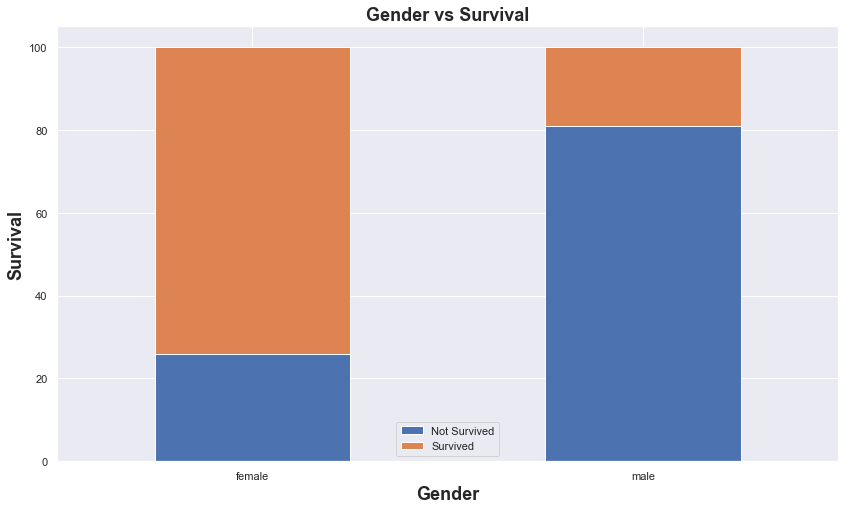

In [10]:
sns.set(rc={'figure.figsize' : (14,8)})
ax=percentage.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
ax.legend(['Not Survived','Survived'])
plt.xlabel('Gender',fontdict=font)
plt.ylabel('Survival',fontdict=font)
plt.title('Gender vs Survival',fontdict=font)
plt.savefig('Gender vs Survival')

In [11]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [12]:
class_survival=train_data.groupby('Pclass')['Survived'].value_counts()

In [13]:
class_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [14]:
one=train_data['Pclass'][train_data['Pclass']==1].count()
two=train_data['Pclass'][train_data['Pclass']==2].count()
three=train_data['Pclass'][train_data['Pclass']==3].count()
percentage_share_one = class_survival[0:2].apply( lambda x: round( 100 * x /one))
percentage_share_two = class_survival[2:4].apply( lambda x: round( 100 * x /two))
percentage_share_three = class_survival[4:6].apply( lambda x: round( 100 * x /three))

In [15]:
percentage=percentage_share_one.append(percentage_share_two)
percentage=percentage.append(percentage_share_three)
percentage

Pclass  Survived
1       1           63.0
        0           37.0
2       0           53.0
        1           47.0
3       0           76.0
        1           24.0
Name: Survived, dtype: float64

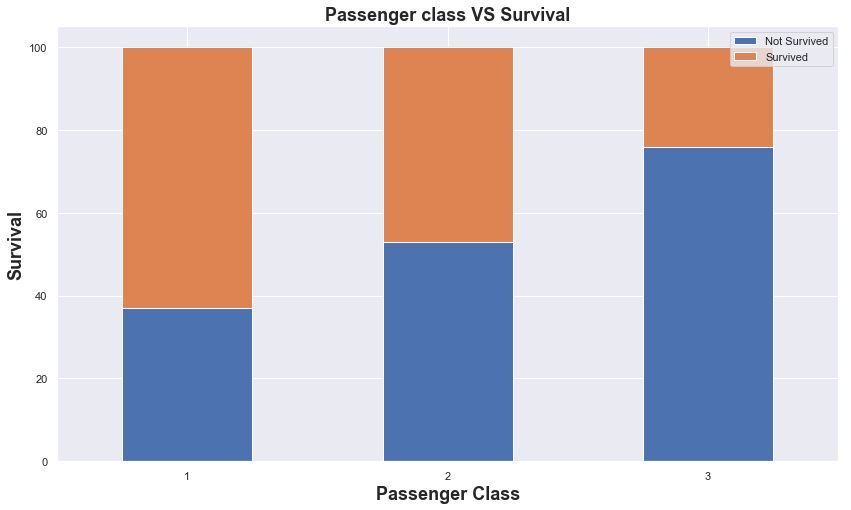

In [16]:
sns.set(rc={'figure.figsize' : (14,8)})
ax=percentage.unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
ax.legend(['Not Survived','Survived'])
plt.xlabel('Passenger Class',fontdict=font)
plt.ylabel('Survival',fontdict=font)
plt.title('Passenger class VS Survival',fontdict=font)
plt.savefig('Passenger class VS Survival')

In [116]:
Fare_data = train_data[['Fare','Survived']].head(40)

In [117]:
Fare_data

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0
5,8.4583,0
6,51.8625,0
7,21.0750,0
8,11.1333,1
9,30.0708,1


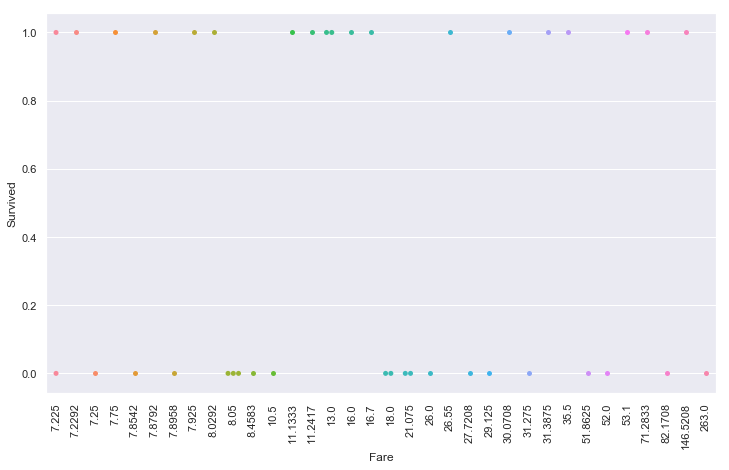

In [129]:
sns.set(rc={'figure.figsize' : (12,7)})

# sns.relplot(x="Fare", y="Survived", kind="line", data=Fare_data)
sns.swarmplot(x="Fare",y="Survived",data=Fare_data)
plt.xticks(rotation=90)
plt.savefig('Effect of Fare')

## Prediction

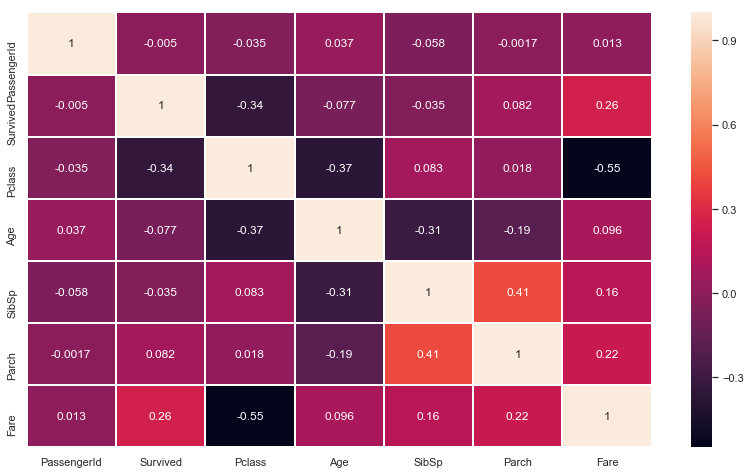

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap( train_data.corr() , annot=True ,linecolor='w' , linewidths=1)

In [18]:
def converter(x):
    if x=='male':
        return 1
    else:
        return 0

In [19]:
train_data['Sex'] = train_data['Sex'].apply(converter)

In [20]:
train_data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

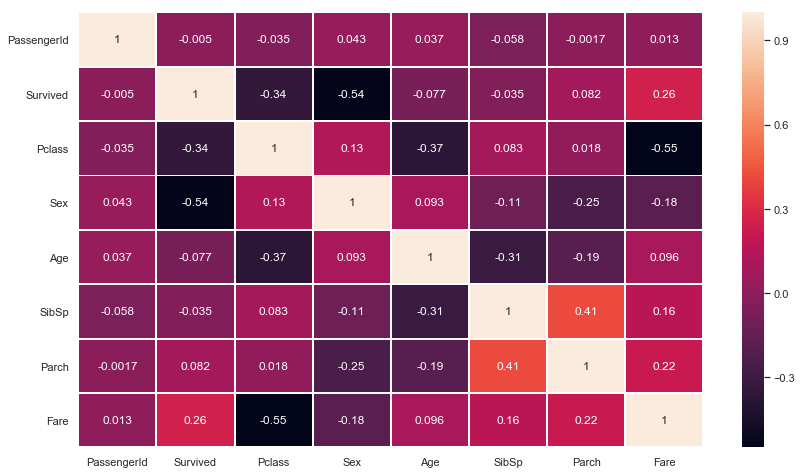

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap( train_data.corr() , annot=True ,linecolor='w' , linewidths=1)

In [22]:
training_data = train_data[['PassengerId','Pclass','Sex','Fare']]

In [23]:
output_data = train_data['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X , x_test, Y , y_test = train_test_split( training_data , output_data , test_size=0.3 , random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X,Y)

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
prediction = model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
confusion = confusion_matrix(prediction,y_test)

In [32]:
confusion

array([[133,  33],
       [ 24,  78]], dtype=int64)

In [33]:
score = accuracy_score(prediction,y_test)

In [34]:
score*100

78.73134328358209

In [41]:
test=pd.read_csv('test.csv')

In [42]:
test.shape

(418, 11)

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
def converter(x):
    if x=='male':
        return 1
    else:
        return 0

In [45]:
test['Sex'] = test['Sex'].apply(converter)

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [70]:
test_data= test[['PassengerId','Pclass','Sex','Fare']]

In [71]:
test_data.columns[test_data.isna().any()].tolist()

['Fare']

In [72]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

C:\Users\jyoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
prediction = model.predict(test_data)

In [74]:
test_predictions_df= {
    'PassengerId' : test['PassengerId'],
    'Survived':prediction
}



In [75]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [78]:
test_predictions_df.to_csv('Submission.csv')

## Using Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
decision_tree_model = DecisionTreeClassifier()

In [132]:
decision_tree_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
prediction = decision_tree_model.predict(x_test)


In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(prediction,y_test)

confusion

array([[128,  38],
       [ 29,  73]], dtype=int64)

In [136]:
score = accuracy_score(prediction,y_test)

score*100

75.0